In [5]:
import pandas as pd

folder   = 'f:/files/python/jupyter/trial5-titanic/'
df_train = pd.read_csv(folder + 'train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
 df_train.shape #mengecek kuantitas data

(891, 12)

In [7]:
df_train.info() #mengecek attribute data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df_train.isnull().sum(axis=0) #mengecek jumlah data kosong

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
#mengisi nilai kosong dengan nilai rata rata. 
#(pengisian nilai default ditentukan kondisi data karena apabila umur diisi dengan 0, distibusi data akan tidak normal)
df_train = df_train.fillna(df_train.mean())
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
#untuk melihat statistik dari kolom yang bertipe numerik

df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
df_train[['Fare', 'Age']].hist(figsize=(16,10), xlabelsize=8, ylabelsize=8)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002034C8FC948>,
      dtype=object)

In [12]:
#0 berarti tidak selamat
#1 berarti selamat

df_train['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [13]:
#presentase jenis kelamin yang selamat
df_train.pivot_table(['Survived'], ['Sex']).sort_values(by = ['Survived'], ascending = False)

,Survived
Sex,
female,0.742038
male,0.188908


In [14]:
#presentase kelas penumpang (1 = Kelas 1, 2 = Kelas 2) per jenis kelamin yang selamat

df_train.pivot_table(['Survived'], ['Sex', 'Pclass']).sort_values(by = ['Survived'], ascending = False)

Survived
Sex    Pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447

In [16]:
#menambahkan kolom bayangan "Alone" untuk menyimpan value penumpang yang naik titanic tanpa pasangan atau saudara
#(0 for k in range) berarti mengisi list "Alone" dengan nilai default 0 sebanyak data df_train
Alone = [0 for k in range(len(df_train))]

#apabila nilai
for p in range(len(df_train)):
    if df_train['SibSp'][p] == 0 and df_train['Parch'][p] == 0 :
        Alone[p] = 1

In [17]:
#memasukkan kolom bayangan kedalam dataset
df_train = df_train.assign(IsAlone = Alone)
df_train['IsAlone'].value_counts()

1    537
0    354
Name: IsAlone, dtype: int64

In [18]:
df_train.pivot_table(['Survived'], ['IsAlone']).sort_values(by = ['Survived'], ascending = False)

,Survived
IsAlone,
0,0.505650
1,0.303538


In [19]:
#menampilkan nilai hubungan antar kolom. nilai berkisar 0 - 1, namun hanya menampilkan data numerik
df_train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,IsAlone
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658,0.057462
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307,-0.203367
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500,0.135207
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566,0.179775
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651,-0.584471
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225,-0.583398
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000,-0.271832
IsAlone,0.057462,-0.203367,0.135207,0.179775,-0.584471,-0.583398,-0.271832,1.000000


In [23]:
df_corr = df_train[['Survived', 'Age', 'Fare', 'IsAlone']]
#membulatkan nilai umur yang ada koma hasil dari mengisi data kosong dengan nilai rata rata
df_corr.loc[:, 'Age'] = df_corr.loc[:, 'Age'].round()
corr = df_corr.corr()['Survived'][1:]
print('Korelasi dengan variabel Survived ', '\n', corr)

Korelasi dengan variabel Survived  
 Age       -0.070324
Fare       0.257307
IsAlone   -0.203367
Name: Survived, dtype: float64


In [25]:
##Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

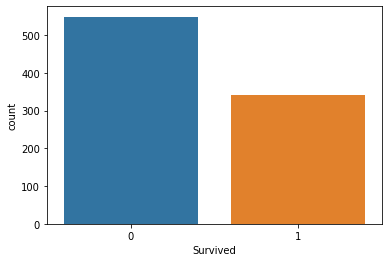

In [26]:
sns.countplot(x = "Survived", data = df_train)

In [27]:
df_train.pivot_table(['Survived'], ['Sex', 'Pclass']).sort_values(by = ["Survived"], ascending = False)

Survived
Sex    Pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447

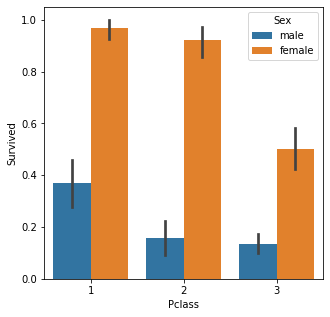

In [28]:
fig, ax = plt.subplots(1, 1, figsize = (5, 5))
sns.barplot(x = "Pclass", y = "Survived", hue = "Sex", data = df_train, ax = ax)

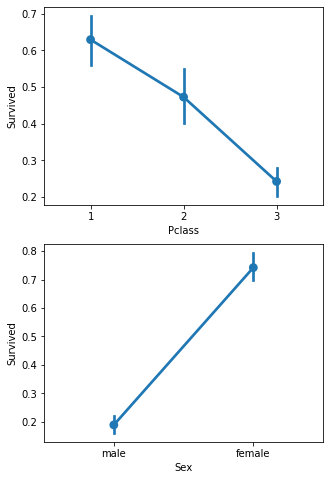

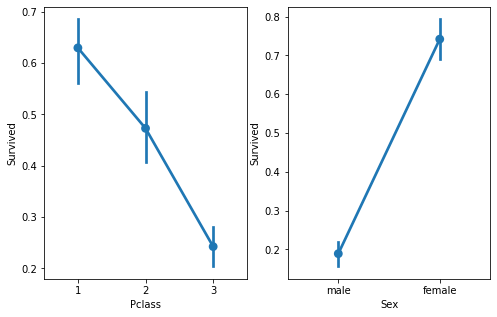

In [29]:
# ax1 = axis1, ax2 = axis2
# subplot(1, 2) => 1 mean graphic generated as 1 row, 2 mean graphic generated as 2 columns

fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (5,8))
sns.pointplot(x = "Pclass", y = "Survived", data = df_train, ax = ax1)
sns.pointplot(x = "Sex", y = "Survived", data = df_train, ax = ax2)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (8,5))
sns.pointplot(x = "Pclass", y = "Survived", data = df_train, ax = ax1)
sns.pointplot(x = "Sex", y = "Survived", data = df_train, ax = ax2)

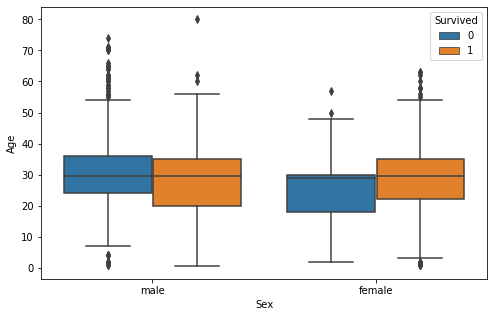

In [30]:
fig, ax = plt.subplots(1, 1, figsize = (8, 5))
sns.boxplot(x = "Sex", y = "Age", data = df_train, hue = "Survived")

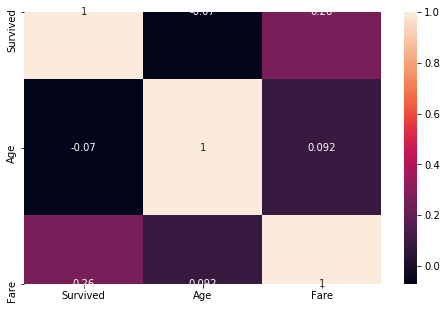

In [32]:
##Visualisasi Korelasi
df_corr = df_train[['Survived', 'Age', 'Fare']]
fig, ax = plt.subplots(1, 1, figsize = (8,5))
sns.heatmap(df_corr.corr(), annot = True)

### How to pick the correct graphic for your data visualization
[how to pick visualization](https://verstaresearch.com/wp-content/uploads/2010/01/VB2010-01-29A.jpg)

In [62]:
##Start Test relationship between isAlone and (Sex, Pclass, Age)
df_train.pivot_table(['IsAlone'], ['Sex', 'Pclass', 'Age']).sort_values(by = ["IsAlone"], ascending = False)

IsAlone
Sex    Pclass Age               
male   3      74.000000      1.0
       2      57.000000      1.0
              33.000000      1.0
              35.000000      1.0
              39.000000      1.0
              46.000000      1.0
              47.000000      1.0
              48.000000      1.0
              50.000000      1.0
              51.000000      1.0
female 2      57.000000      1.0
              55.000000      1.0
male   2      52.000000      1.0
              59.000000      1.0
female 2      21.000000      1.0
male   2      62.000000      1.0
              66.000000      1.0
       1      29.699118      1.0
female 2      35.000000      1.0
male   2      70.000000      1.0
female 2      32.500000      1.0
              32.000000      1.0
              29.699118      1.0
male   3      19.000000      1.0
              20.500000      1.0
female 2      23.000000      1.0
       3      13.000000      1.0
male   2      29.699118      1.0
              27.000000      1.0
              26.000000      1.0
...                          ...
              0.830000       0.0
              1.000000       0.0
              2.000000       0.0
              3.000000       0.0
       3      2.000000       0.0
              1.000000       0.0
              0.420000       0.0
female 2      41.000000      0.0
male   2      60.000000      0.0
female 2      44.000000      0.0
              48.000000      0.0
       3      0.750000       0.0
              1.000000       0.0
              2.000000       0.0
              3.000000       0.0
              4.000000       0.0
male   2      44.000000      0.0
              43.000000      0.0
female 3      6.000000       0.0
male   2      37.000000      0.0
              36.500000      0.0
female 3      8.000000       0.0
              9.000000       0.0
              10.000000      0.0
              11.000000      0.0
male   2      32.500000      0.0
female 3      14.500000      0.0
              29.000000      0.0
male   2      8.000000       0.0
female 1      2.000000       0.0

[289 rows x 1 columns]

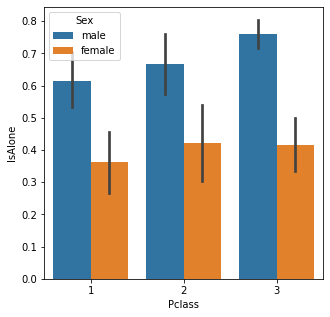

In [63]:
fig, ax = plt.subplots(1, 1, figsize = (5, 5))
sns.barplot(x = "Pclass", y = "IsAlone", hue = "Sex", data = df_train, ax = ax)

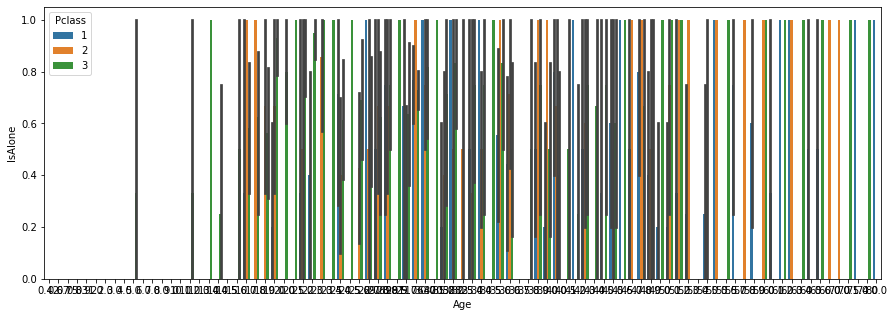

In [65]:
fig, ax = plt.subplots(1, 1, figsize = (15, 5))
sns.barplot(x = "Age", y = "IsAlone", hue = "Pclass", data = df_train, ax = ax)

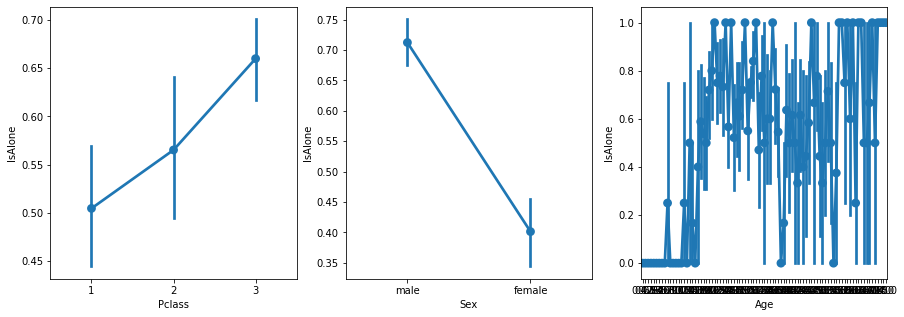

In [67]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15,5))
sns.pointplot(x = "Pclass", y = "IsAlone", data = df_train, ax = ax1)
sns.pointplot(x = "Sex", y = "IsAlone", data = df_train, ax = ax2)
sns.pointplot(x = "Age", y = "IsAlone", data = df_train, ax = ax3)

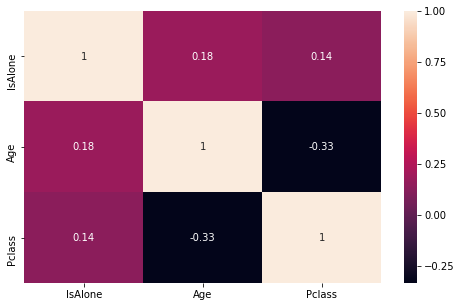

In [68]:
df_corr = df_train[['IsAlone', 'Age', 'Sex', 'Pclass']]
fig, ax = plt.subplots(1, 1, figsize = (8,5))
sns.heatmap(df_corr.corr(), annot = True)

In [ ]:
##End Test Data Visualization

In [35]:
#correct answer test
folder   = 'f:/files/python/jupyter/trial5-titanic/'
df_train = pd.read_csv(folder + 'train.csv')
Alone    = [0 for k in range(len(df_train))]

for p in range(len(df_train)) :
    if df_train['SibSp'][p] == 0 and df_train['Parch'][p] == 0 :
        Alone[p] = 1
        
df_train = df_train.assign(IsAlone = Alone)
df_train['IsAlone'].value_counts()

1    537
0    354
Name: IsAlone, dtype: int64

Text(0, 0.5, 'Umur')

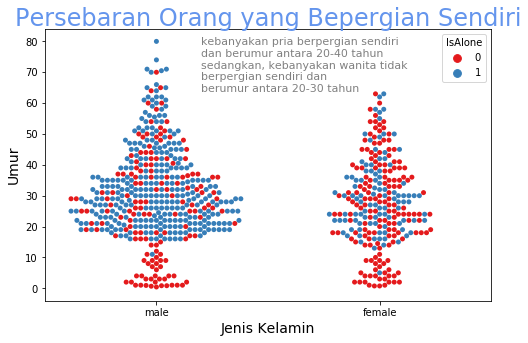

In [52]:
fig, ax = plt.subplots(1, 1, figsize = (8, 5))
sns.swarmplot(x="Sex", y="Age", data=df_train, hue="IsAlone", palette="Set1")

insight = '''
kebanyakan pria berpergian sendiri 
dan berumur antara 20-40 tahun
sedangkan, kebanyakan wanita tidak 
berpergian sendiri dan 
berumur antara 20-30 tahun
'''

ax.text(0.5, 85, "Persebaran Orang yang Bepergian Sendiri", horizontalalignment="center", color="cornflowerblue", fontsize=24, fontweight="normal")
ax.text(0.2, 60, insight, horizontalalignment="left", color="grey", fontsize=11, fontweight="normal")
ax.set_xlabel('Jenis Kelamin', fontsize=14)
ax.set_ylabel('Umur', fontsize=14)